In [1]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached regex-2024.11.6-c

[nltk_data] Downloading package stopwords to C:\Users\Mahamat
[nltk_data]     Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Taille initiale : (568454, 10)
Taille après nettoyage : (568454, 2)


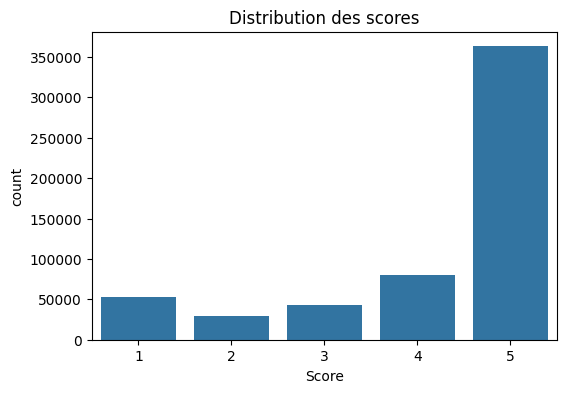

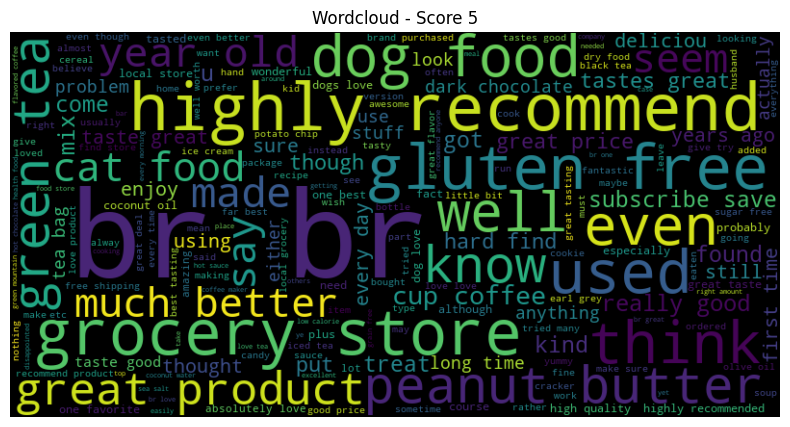

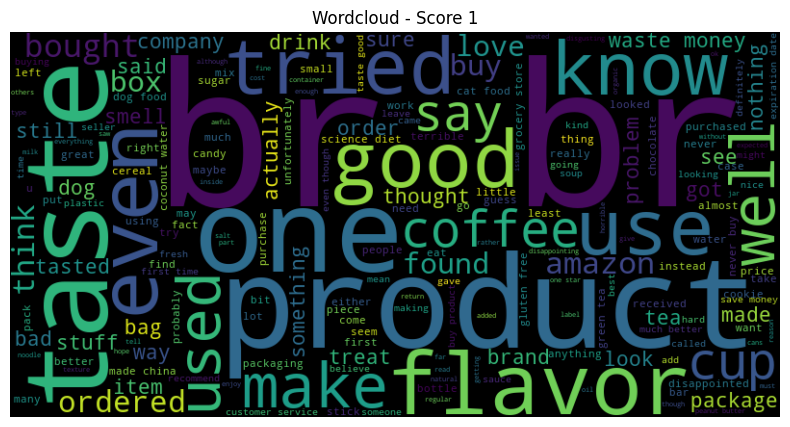

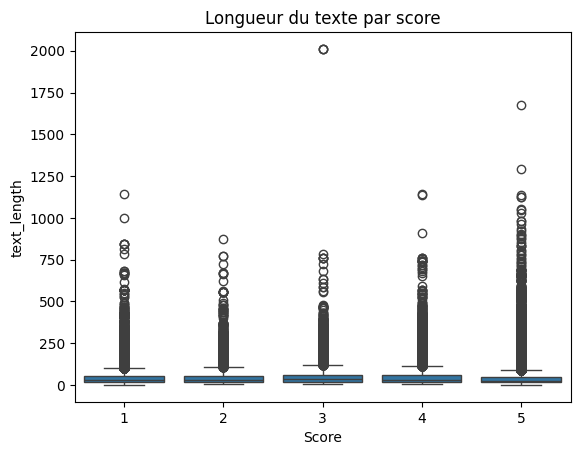

In [8]:
# EDA_cleaning.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
from nltk.corpus import stopwords

# Charger le dataset
df = pd.read_csv("../data/Reviews.csv")
print("Taille initiale :", df.shape)

# Garde uniquement les colonnes utiles
df = df[['Text', 'Score']]
df = df.dropna()
df = df[df['Score'].isin([1,2,3,4,5])]
print("Taille après nettoyage :", df.shape)

# Nettoyage du texte
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['Text'].apply(clean_text)

# Distribution des scores
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df)
plt.title("Distribution des scores")
plt.show()

# Nuage de mots
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, max_words=200).generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['Score']==5]['clean_text'], "Wordcloud - Score 5")
plot_wordcloud(df[df['Score']==1]['clean_text'], "Wordcloud - Score 1")

# Longueur de texte
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.boxplot(x='Score', y='text_length', data=df)
plt.title("Longueur du texte par score")
plt.show()

# Sauvegarde pour les modèles
df = df[['clean_text', 'Score']]
df = df.sample(50000, random_state=42)  # Limite pour entraînement plus rapide
df.to_csv("clean_reviews.csv", index=False)
